A variational inversion minimizes the following cost function

$$ J = (\mathbf{z} - \mathbf{Hx})^\text{T} \mathbf{S_z}^{-1} (\mathbf{z}-\mathbf{Hx}) + (\mathbf{x}-\mathbf{x}_0)^\text{T} \mathbf{S_x}^{-1} (\mathbf{x}-\mathbf{x}_0) $$

iteratively. A minimizer is called that accepts -- for each $\mathbf{x}$ -- the cost function and its gradient. The gradient is evaluated by the adjoint model. As explained in `bits_and_pieces.ipynb`, the minimization is done as a function of $\xi$ instead of $\mathbf{x}$.

In [2]:
from var4d_components import Var4D_Components
from visualize_results import Visualize_Obs, Visualize_Fluxes, Diagnostic_Plots

# First example

* Only assimilate flask data from NOAA observatories Mauna Loa (MLO), Barrow (BRW), Samoa (SMO) and South Pole (SPO)
* Error in flux = 0.25 $\times$ absolute NEE on land, 0.5 $\times$ absolute ocean flux on ocean (a similar config is often the default in inversions)
* Temporal correlation of 2 months in prior flux error, no spatial (cross-region) correlation
* Print out and store intermediate cost functions and gradient norms

In [3]:
var4d = Var4D_Components('only_noaa_observatories', verbose=False, store_intermediate=True) # change verbose to False to see fancy progress bars and suppress prints
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'sites': ['mlo', 'spo', 'brw', 'smo']} # just the four observatories
prior_flux_unc_dict = {'prior_unc_source': 'nee', 'prior_unc_scale': {'land': 0.25, 'ocean': 0.5}}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, **prior_flux_unc_dict)

Converting CT2022 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

1245 of 1156383 obs will be assimilated


Converting SiB4 to state vector:   0%|          | 0/24 [00:00<?, ?it/s]

The default maximum number of iterations is 500, and convergence is said to be achieved if $\left\Vert\partial J/\partial\xi\right\Vert_2 \leq 10^{-4}$. These can be changed with the `max_iter` and `gradnorm` keywords to `var4d_chain`. The default optimization scheme is BFGS, and an alternative can be specified with the `optim_method` keyword. A full list of optimizers and their options can be found [here](https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.optimize.minimize.html).

In [4]:
var4d.var4d_chain(gradnorm=1.0E-5)

Cost function evaluation: |          | 0 [00:00, ?it/s]

Gradient evaluation: |          | 0 [00:00, ?it/s]

Forward transport: |          | 0 [00:00, ?it/s]

Adjoint transport: |          | 0 [00:00, ?it/s]

Hessian product evaluation: |          | 0 [00:00, ?it/s]

End of 4DVAR loop


### Visualize the results

The intermediate cost functions and gradient norms as a function of iteration.

__Question: Why are there more cost function and gradient evaluations than there are iterations?__

__Question: What would happen if you had less or more observations to assimilate?__

__Question: Try a different minimizer (see full documentation [here](https://docs.scipy.org/doc/scipy-1.13.1/reference/generated/scipy.optimize.minimize.html))__

__Question: How loose of a convergence criterion can your model tolerate and still get good results?__

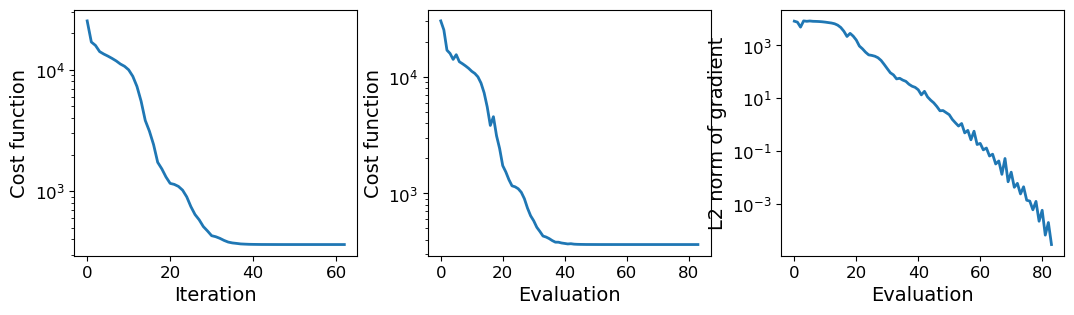

In [5]:
diag = Diagnostic_Plots('only_noaa_observatories')
diag.plot_convergence()

#### How well did the inversion fit the atmospheric observations?
* We assimilated SPO, MLO, SMO and BRW. Were those fit well?
* We __dit not__ assimilate any other sites, so let's see how well some of them were fit, such as KUM (Kumukahi, Hawai'i), AMT (Argyle, Maine), LEF (Park Falls, Wisconsin) and CRZ (Crozet Island, southern Indian Ocean)
* __Question: In what seasons were these latter sites fit well/poorly and why?__

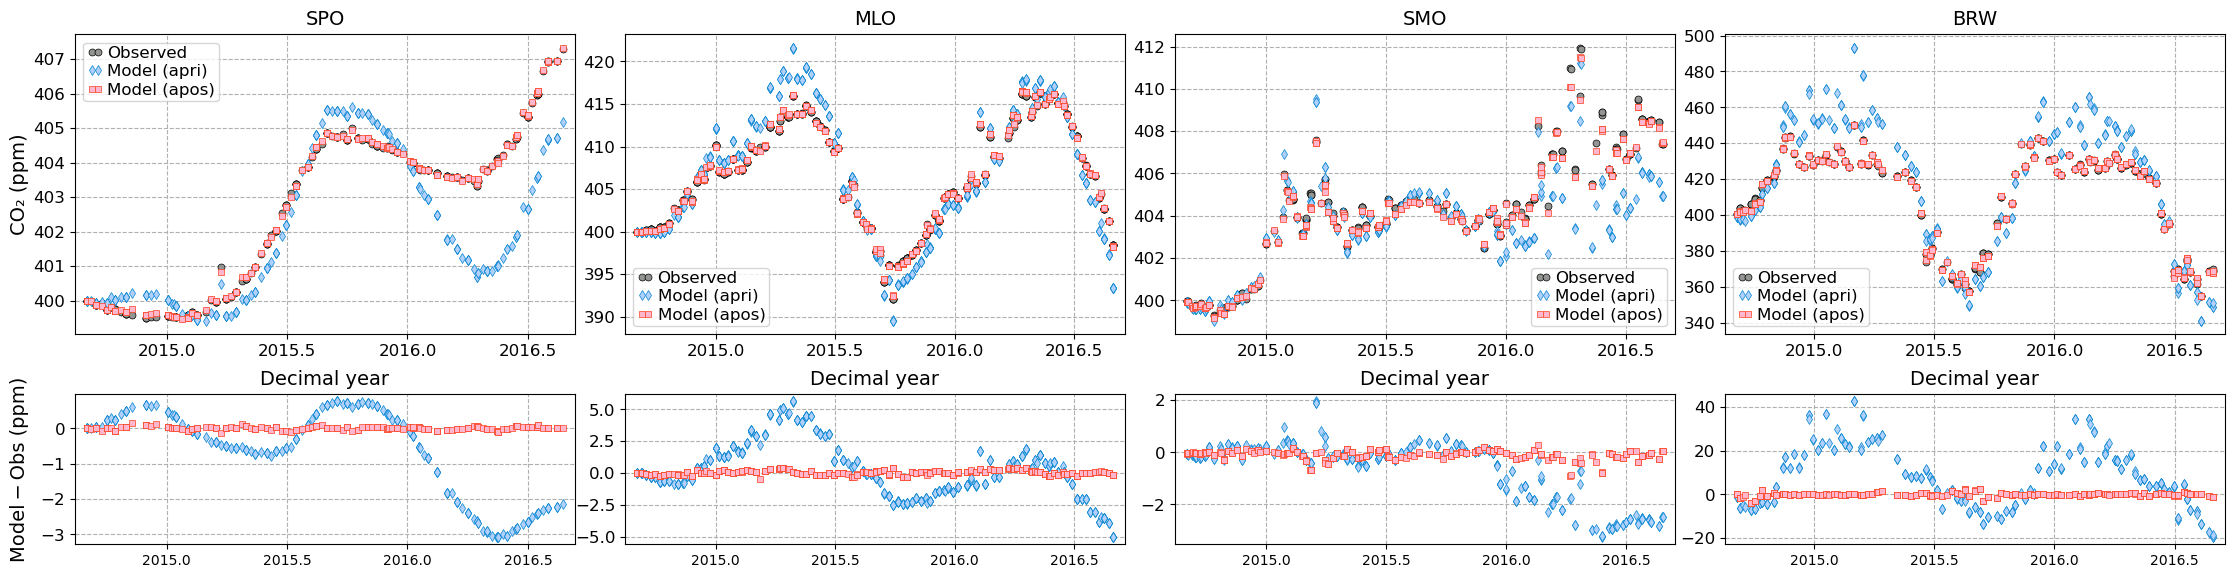

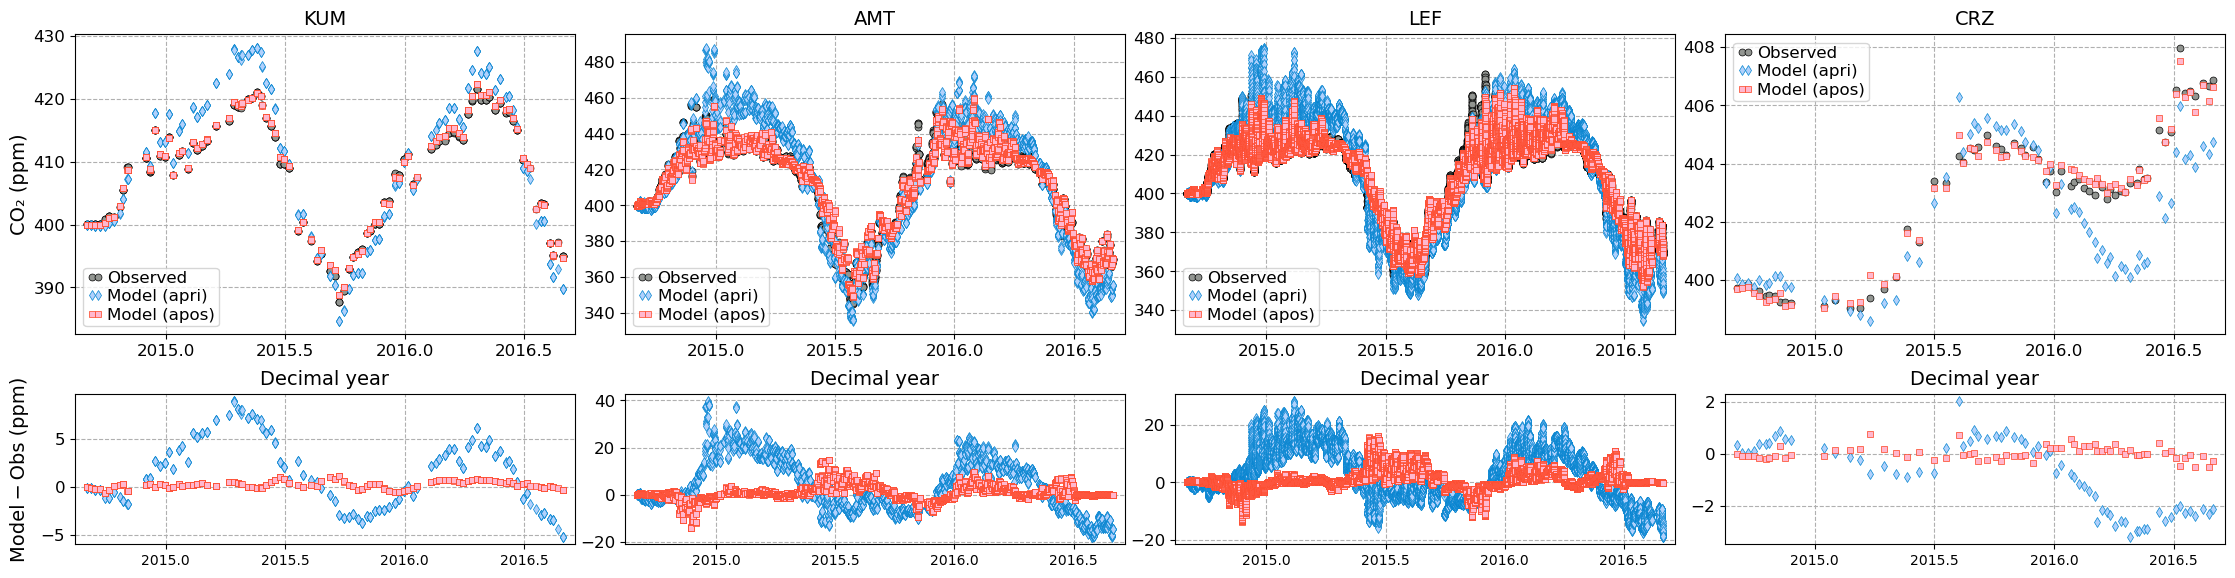

In [5]:
po1 = Visualize_Obs('only_noaa_observatories')
po1.plot_site(['spo','mlo','smo', 'brw'])
po1.plot_site(['kum','amt','lef','crz'])

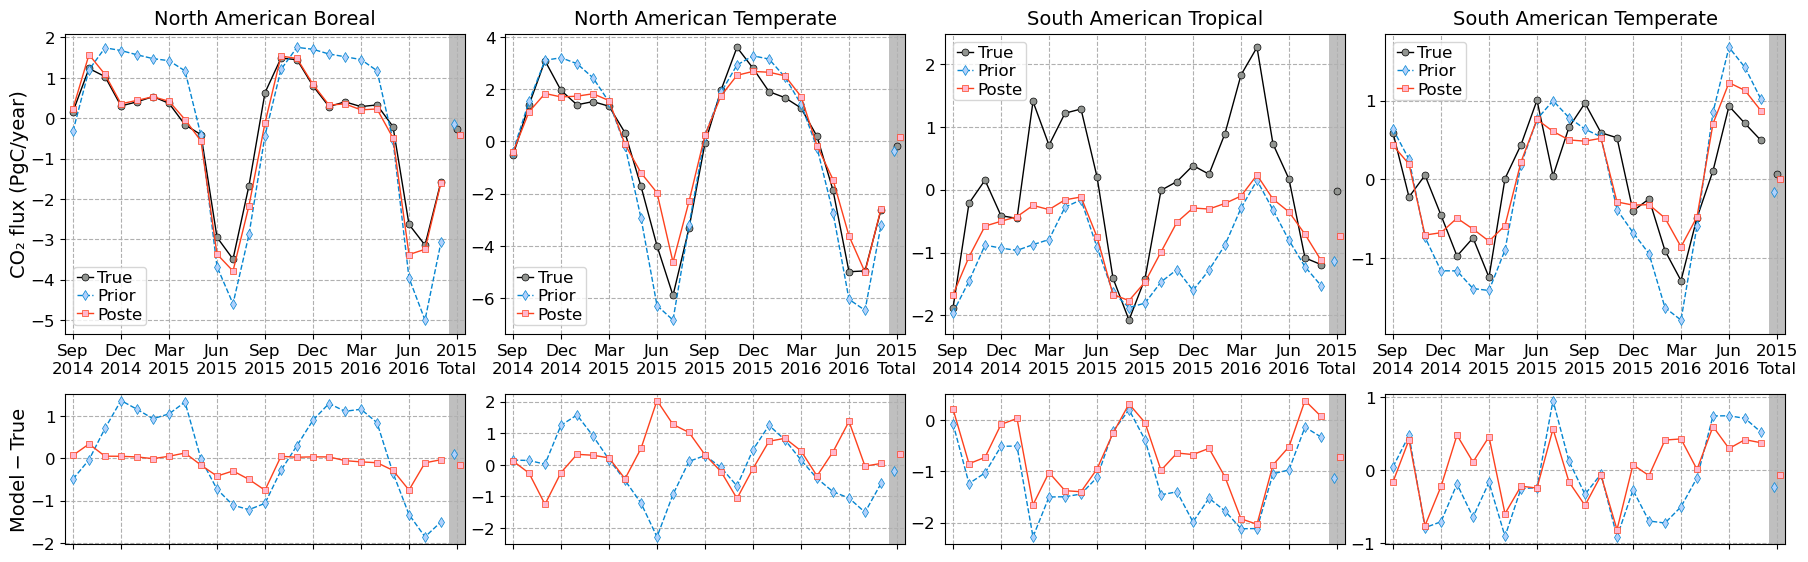

In [6]:
vf1 = Visualize_Fluxes('only_noaa_observatories')
vf1.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

## Change the error setting to key off ecosystem respiration instead of NEE

* Error in flux = 0.5 $\times$ absolute flux for oceans, 0.25 $\times$ ecosystem respiration for land

In [ ]:
var4d = Var4D_Components('only_noaa_observatories_reco', verbose=False, store_intermediate=True) # change verbose to True to see the progress of the optimizer
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'sites': ['mlo', 'spo', 'brw', 'smo']} # just the four observatories
prior_flux_unc_dict = {'prior_unc_source': 'reco', 'prior_unc_scale': {'land': 0.25, 'ocean': 0.5}}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, **prior_flux_unc_dict)

In [ ]:
var4d.var4d_chain(gradnorm=1.0E-5)

In [ ]:
diag = Diagnostic_Plots('only_noaa_observatories_reco')
diag.plot_convergence()

##### Note that this took longer to converge

In [ ]:
po1 = Visualize_Obs('only_noaa_observatories_reco')
po1.plot_site(['spo','mlo','smo', 'brw'])
po1.plot_site(['kum','amt','lef','crz'])

##### But the simulation of non-assimilated obs is better!

In [ ]:
vf1 = Visualize_Fluxes('only_noaa_observatories_reco')
vf1.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

##### Recovery of true fluxes over the Tropics is also better (Why?)

# Second (example) inversion
* Assimilate all in situ observations that were assimilated in the OCO2 MIP
* Same error structure as before, NEE error keyed off ecosystem respiration
* Temporal correlation of 2 months in prior flux error, no spatial (cross-region) correlation
* Print out and store intermediate cost functions and gradient norms

In [ ]:
obs_to_assim = {'is': True}
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
prior_flux_unc_dict = {'prior_unc_source': 'reco', 'prior_unc_scale': {'land': 0.25, 'ocean': 0.5}}
var4d = Var4D_Components('all_insitu', verbose=True, store_intermediate=True)
var4d.var4d_setup(obs_to_assim=obs_to_assim, corr_structure=flux_corr_structure, **prior_flux_unc_dict)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

In [ ]:
po2 = Visualize_Obs('all_insitu')
po2.plot_site(['spo','mlo','smo', 'brw'])
po2.plot_site(['kum','amt','lef','crz'])

In [ ]:
vf2 = Visualize_Fluxes('all_insitu')
vf2.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])